In [1]:
train_dir = 'C:/Users/Marya/OneDrive - Middle East College/Fall 2023/Artificial intelligence/assign/dataset/train'
test_dir = 'C:/Users/Marya/OneDrive - Middle East College/Fall 2023/Artificial intelligence/assign/dataset/test'

In [2]:
import os
print(len(os.listdir('C:/Users/Marya/OneDrive - Middle East College/Fall 2023/Artificial intelligence/assign/dataset/train/cracked')))
print(len(os.listdir('C:/Users/Marya/OneDrive - Middle East College/Fall 2023/Artificial intelligence/assign/dataset/train/solid')))
print(len(os.listdir('C:/Users/Marya/OneDrive - Middle East College/Fall 2023/Artificial intelligence/assign/dataset/test/cracked')))
print(len(os.listdir('C:/Users/Marya/OneDrive - Middle East College/Fall 2023/Artificial intelligence/assign/dataset/test/solid')))

1000
1000
1000
1000


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  
    subset='training'  
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) 
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3


50/50 [==============================] - 64s 1s/step - loss: 0.5734 - accuracy: 0.7025 - val_loss: 0.1492 - val_accuracy: 0.9450
Epoch 2/3
50/50 [==============================] - 54s 1s/step - loss: 0.2018 - accuracy: 0.9594 - val_loss: 0.1909 - val_accuracy: 0.9350
Epoch 3/3
50/50 [==============================] - 57s 1s/step - loss: 0.1259 - accuracy: 0.9663 - val_loss: 0.0879 - val_accuracy: 0.9750


In [9]:
import matplotlib.pyplot as plt

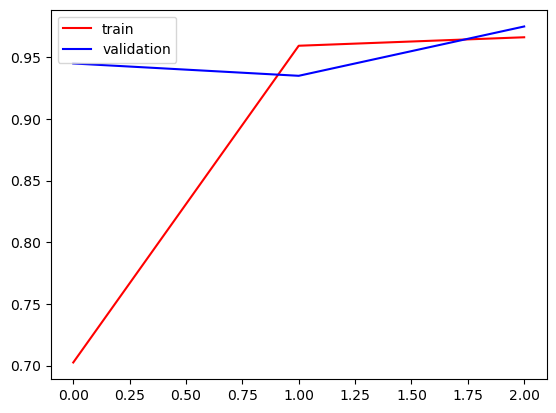

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

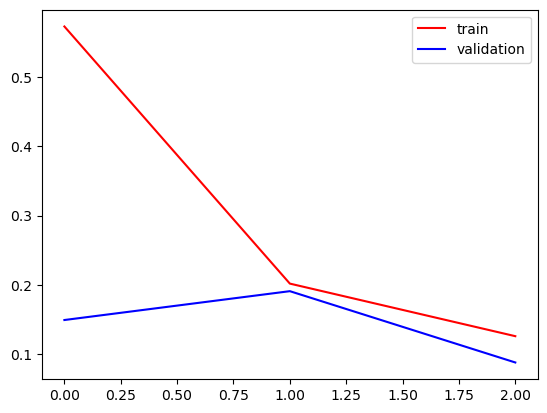

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [14]:
predictions = model.predict(test_data)
print(predictions)

63/63 [==============================] - 14s 215ms/step
[[3.8864639e-02]
 [9.1835064e-01]
 [9.8360783e-01]
 ...
 [7.2972447e-02]
 [1.8030291e-07]
 [9.5041269e-01]]


In [15]:
len(predictions)

2000

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int) 

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[538 462]
 [507 493]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.54      0.53      1000
           1       0.52      0.49      0.50      1000

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000

